In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = pd.read_csv("data/csl-data.csv")
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data = data.set_index('timestamp')
week_data = data.resample('W-MON', label='left').count()['year']
week_data.name = 'count'
week_data.tail()

timestamp
2020-10-05    562
2020-10-12    500
2020-10-19    369
2020-10-26     91
2020-11-02    152
Freq: W-MON, Name: count, dtype: int64

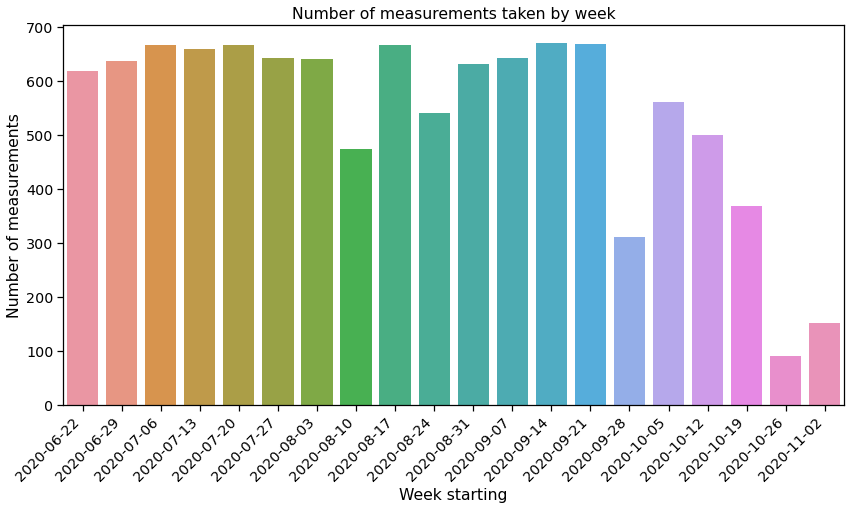

In [91]:
import datetime

sns.set_context('notebook', font_scale=1.3)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=week_data.index, y=week_data.values)
plt.xticks(rotation=45);
plt.ylabel('Number of measurements')
plt.xlabel('Week starting')
plt.title('Number of measurements taken by week')

x_dates = week_data.index.strftime('%Y-%m-%d')
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right');

In [92]:
month_data = pd.DataFrame(data.resample('H').count()['year'])
month_data['on'] = (month_data['year'] > 0).astype(int)
month_data = month_data.drop('year', axis=1)
month_data['month'] = month_data.index.month
month_data = month_data.groupby('month').mean()
month_data['on'] = month_data['on'] * 100
month_data.head(6)

,on
month,
6,100.000000
7,98.655914
8,90.053763
9,97.916667
10,56.720430
11,31.250000


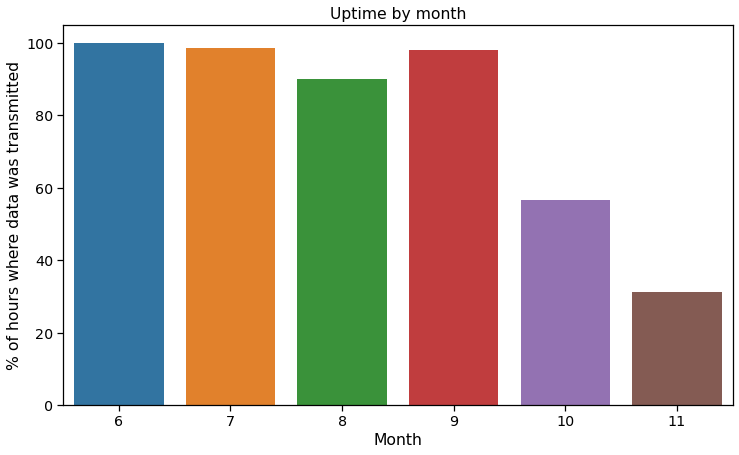

In [94]:
plt.figure(figsize=(12, 7))
sns.barplot(x=month_data.index, y=month_data.on)
plt.title('Uptime by month')
plt.ylabel('% of hours where data was transmitted')
plt.xlabel('Month');